# Pipelining: chaining a PCA and a logistic regression

Adapted from http://scikit-learn.org/stable/auto_examples/plot_digits_pipe.html

The PCA does an unsupervised dimensionality reduction, while the logistic regression does the prediction.

We use a GridSearchCV to set the dimensionality of the PCA

In [1]:
using ScikitLearn, PyPlot
using ScikitLearn.GridSearch: GridSearchCV
using ScikitLearn.Pipelines: Pipeline, named_steps

@sk_import decomposition: PCA
@sk_import datasets: load_digits
@sk_import linear_model: LogisticRegression

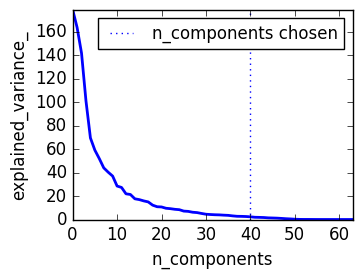

PyObject <matplotlib.legend.Legend object at 0x31eedacd0>

In [2]:
# Original Python Code source: Gaël Varoquaux
# License: BSD 3 clause

logistic = LogisticRegression(max_iter=150)

pca = PCA()
pipe = Pipeline([("pca", pca), ("logistic", logistic)])

digits = load_digits()
X_digits = digits["data"]
y_digits = digits["target"]

###############################################################################
# Plot the PCA spectrum
fit!(pca, X_digits)

figure(1, figsize=(4, 3))
clf()
PyPlot.axes([.2, .2, .7, .7])
plot(pca.explained_variance_, linewidth=2)
axis("tight")
xlabel("n_components")
ylabel("explained_variance_")

###############################################################################
# Prediction

n_components = [20, 40, 64]
Cs = 10 .^ range(-4; stop=4, length=3)

#Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(pipe,
                         Dict("pca__n_components"=>n_components,
                              "logistic__C"=>Cs))
fit!(estimator, X_digits, y_digits)

axvline(named_steps(estimator.best_estimator_)["pca"].n_components,
            linestyle=":", label="n_components chosen")
legend(prop=Dict("size"=>12))